### Implementation in Python for Video 17: MATLAB: covariance of simulated data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000       # time points
M = 20         # channels
n_trials = 50  # number of trials

# time vector (radian units)
t = np.linspace(0, 6*np.pi, N)

# relationship across channels (imposing covariance)
chan_rel = np.sin(np.linspace(0, 2*np.pi, M));

In [3]:
# Generating data
data = np.zeros((2, n_trials, M, N))

for n in range(n_trials):
    data1 = np.zeros((M, N))
    data1[:, :] = np.sin(t)
    data1 = (data1.T * chan_rel).T
    data1 = data1 + np.random.randn(M, N)
    data[0, n] = data1

    data2 = np.zeros((M, N))
    data2[:, :] = np.sin(t+np.random.rand()*2*np.pi)
    data2 = (data2.T * chan_rel).T
    data2 = data2 + np.random.randn(M, N)
    data[1, n] = data2

del data1
del data2

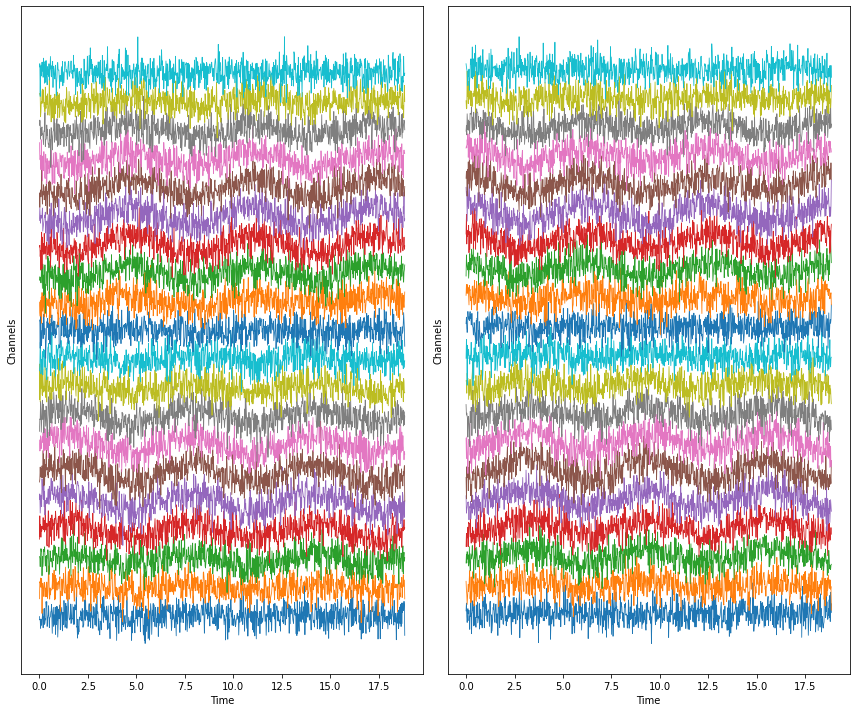

In [4]:
# Visual inspection of the time series data
sum_list = np.array(range(M))*3

# Set figure size
plt.figure(figsize=(12, 10))

# Simulation 1
plt.subplot(1, 2, 1)
random_trial = np.random.randint(0, 50)
plt.plot(t, (data[0, random_trial].T + sum_list), linewidth=0.8)
plt.yticks([])
plt.ylabel('Channels')
plt.xlabel('Time')

# Simulation 2
plt.subplot(1, 2, 2)
random_trial = np.random.randint(0, 50)
plt.plot(t, (data[1, random_trial].T + sum_list), linewidth=0.8)
plt.yticks([])
plt.ylabel('Channels')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

In [5]:
# Compute covariance matrix element-wise

cov_mat1 = np.zeros((M, M))

# Compute the trial average (ERP)
data_ave = np.mean(data[0], axis=0)

In [6]:
# Double loop over channels and compute dot product scaled by N-1
for i in range(M):
    for j in range(M):

        # Mean-center data
        subi = data_ave[i] - np.mean(data_ave[i])
        subj = data_ave[j] - np.mean(data_ave[j])

        # Compute covariance
        cov_mat1[i, j] = sum(subi*subj) / (N-1)

In [7]:
# Covariance via matrix multiplication

# Mean-center (over time)
data_ave_mean = (data_ave.T - np.mean(data_ave)).T

# All pairwise dot products as the matrix times its transpose
cov_mat2 = (data_ave_mean@data_ave_mean.T) / (N - 1)

In [8]:
# Covariance using numpy.cov function

# cov will mean-center the data
cov_mat3 = np.cov(data_ave)

# Checking size (shape) to make sure it's the correct orientation
cov_mat3.shape

(20, 20)

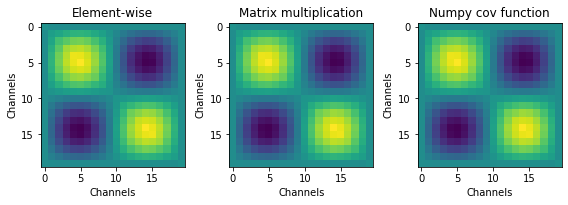

In [9]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(cov_mat1)
plt.title('Element-wise')
plt.xlabel('Channels')
plt.ylabel('Channels')

plt.subplot(1, 3, 2)
plt.imshow(cov_mat2)
plt.title('Matrix multiplication')
plt.xlabel('Channels')
plt.ylabel('Channels')

plt.subplot(1, 3, 3)
plt.imshow(cov_mat3)
plt.title('Numpy cov function')
plt.xlabel('Channels')
plt.ylabel('Channels')

plt.tight_layout()
plt.show()

### Compute the covariance matrices for two datasets

In [10]:
cov_mat1, cov_mat2 = np.zeros((2, M, M))

In [11]:
for trial in range(n_trials):

    tmp_data = data[0, trial]
    tmp_data = (tmp_data.T - np.mean(tmp_data, axis=1)).T
    cov_mat1 = cov_mat1 + tmp_data@tmp_data.T/(N - 1)

    tmp_data = data[1, trial]
    tmp_data = (tmp_data.T - np.mean(tmp_data, axis=1)).T
    cov_mat2 = cov_mat2 + tmp_data@tmp_data.T/(N - 1)

cov_mat1 = cov_mat1 / n_trials
cov_mat2 = cov_mat2 / n_trials

In [12]:
data_ave1 = np.mean(data[0], axis=0)
data_ave2 = np.mean(data[1], axis=0)

# Covariance for data 1
tmp_data = (data_ave1.T - np.mean(data_ave1)).T
cov_mat3 = (tmp_data@tmp_data.T) / (N - 1)

# Covariance for data 2

tmp_data = (data_ave2.T - np.mean(data_ave2)).T
cov_mat4 = (tmp_data@tmp_data.T) / (N - 1)

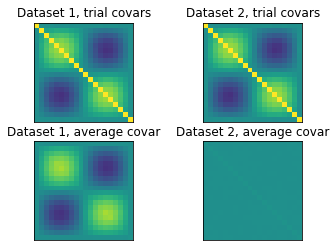

In [13]:
plt.figure(figsize=(4, 4))
plt.subplot(2, 2, 1)
plt.imshow(cov_mat1)
plt.title('Dataset 1, trial covars')
plt.xticks([])
plt.yticks([])
plt.clim(-.7, .7)

plt.subplot(2, 2, 2)
plt.imshow(cov_mat2)
plt.title('Dataset 2, trial covars')
plt.xticks([])
plt.yticks([])
plt.clim(-.7, .7)

plt.subplot(2, 2, 3)
plt.imshow(cov_mat3)
plt.title('Dataset 1, average covar')
plt.xticks([])
plt.yticks([])
plt.clim(-.7, .7)

plt.subplot(2, 2, 4)
plt.imshow(cov_mat4)
plt.title('Dataset 2, average covar')
plt.xticks([])
plt.yticks([])
plt.clim(-.7, .7)

plt.subplots_adjust(right=1.2)
plt.show()